# Midterm Project: Potability Water Detection

## Loading Database

In [1]:
#import pandas
import pandas as pd
#loading csv file
waters = pd.read_csv("waterQuality1.csv")

In [2]:
waters.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


##

## Checking for Null Values

In [3]:
#Check how many Null Values in each Column
waters.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

## Identifying Features and Target Variables

In [4]:
#split dataset into features and target variables
feature_cols = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']
X = waters[feature_cols]  #features
y = waters.is_safe     #target

## Splitting Data into Training and Testing Data

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training Logistic Regression Model

In [6]:
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=8000)

# fit the model with data
logreg.fit(X_train.values,y_train.values)

LogisticRegression(max_iter=8000)

## Training SVM Model

In [7]:
#import svm model
from sklearn import svm

#create a svm Classifier
svmClf = svm.SVC(kernel='linear') #Linear Kernel

#Train the model using the trainings sets
svmClf.fit(X_train.values, y_train.values)

SVC(kernel='linear')

## Training Decision Tree Model

In [8]:
from sklearn.tree import DecisionTreeClassifier
treeClf = DecisionTreeClassifier()
treeClf.fit(X_train.values, y_train.values)

DecisionTreeClassifier()

## Prediction with Log. Regression, SVM, and Decision Tree

In [9]:
#Predict the response for test datasets
y_pred_svm = svmClf.predict(X_test)

y_pred_log = logreg.predict(X_test)

y_pred_tree = treeClf.predict(X_test)

# compute the accuracy
import numpy as np
accuracy_svm = np.sum(y_pred_svm == y_test) / len(y_test)

accuracy_log = np.sum(y_pred_log == y_test) / len(y_test)

accuracy_tree = np.sum(y_pred_tree == y_test) / len(y_test)

C:\Users\cesma\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\cesma\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\cesma\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## Training Neural Network

In [10]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X)
X = scalar.transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
X_train.shape

(6399, 20)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

neuralClf = Sequential()
neuralClf.add(Dense(16, input_dim = 20, activation = 'relu'))
neuralClf.add(Dense(7, activation='relu'))
neuralClf.add(Dense(2, activation='relu'))
neuralClf.add(Dense(6, activation='relu'))
neuralClf.add(Dense(1, activation='sigmoid'))

In [14]:
neuralClf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
neuralClf.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001DD0CB72BE0>>

In [17]:
history = neuralClf.fit(X_train, y_train.values, epochs=50, batch_size=16)

Epoch 1/50
400/400 [==============================] - 1s 1ms/step - loss: 0.4140 - accuracy: 0.8840
Epoch 2/50
400/400 [==============================] - 0s 1ms/step - loss: 0.2880 - accuracy: 0.8848
Epoch 3/50
400/400 [==============================] - 0s 1ms/step - loss: 0.2631 - accuracy: 0.8848
Epoch 4/50
400/400 [==============================] - 0s 1ms/step - loss: 0.2493 - accuracy: 0.8848
Epoch 5/50
400/400 [==============================] - 0s 1ms/step - loss: 0.2353 - accuracy: 0.9069
Epoch 6/50
400/400 [==============================] - 0s 1ms/step - loss: 0.2218 - accuracy: 0.9153
Epoch 7/50
400/400 [==============================] - 0s 1ms/step - loss: 0.2093 - accuracy: 0.9190
Epoch 8/50
400/400 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9205
Epoch 9/50
400/400 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9239
Epoch 10/50
400/400 [==============================] - 0s 998us/step - loss: 0.1825 - accuracy: 0.92

## Prediction with Neural Network

In [18]:
neuralClf.predict(X_test)
neuralClf.evaluate(X_test, y_test)[1]
neuralClf.fit(X_train, y_train)
predictions = neuralClf.predict(X_test)
y_pred_neural = (neuralClf.predict(X_test) > 0.5).astype(int)

200/200 [==============================] - 1s 2ms/step - loss: 0.0964 - accuracy: 0.9652


## Computation of Accuracy and Comparison

In [19]:
print('Test Accuracy of the SVM is:')
print(accuracy_svm)
print('Test Accuracy of the Logistic Model is:')
print(accuracy_log)
print('Test Accuracy of the Decision Tree Model is')
print(accuracy_tree)
print('The difference (SVM - Logistic):')
print(accuracy_svm - accuracy_log)

Test Accuracy of the SVM is:
0.9075
Test Accuracy of the Logistic Model is:
0.89875
Test Accuracy of the Decision Tree Model is
0.9525
The difference (SVM - Logistic):
0.008749999999999925


# Confusion Matrices

## Logistic Regression

In [20]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_log = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix_log

array([[1357,   68],
       [ 163,   12]], dtype=int64)

## SVM Model

In [21]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cnf_matrix_svm

array([[1364,   61],
       [ 164,   11]], dtype=int64)

## Decision Tree

In [22]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_tree = metrics.confusion_matrix(y_test, y_pred_tree)
cnf_matrix_tree

array([[1272,  153],
       [ 142,   33]], dtype=int64)

## Neural Network

In [23]:
y_pred_neural.size

1600

In [24]:
# import the metrics class
from sklearn import metrics
# Confusion Matrix for Logistic Regression
cnf_matrix_neural = metrics.confusion_matrix(y_test, y_pred_neural)
cnf_matrix_neural

array([[1401,   24],
       [  44,  131]], dtype=int64)

## Visualizing Confusion Matrix using HeatMap

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Logistic Regression

Text(0.5, 257.44, 'Predicted label')

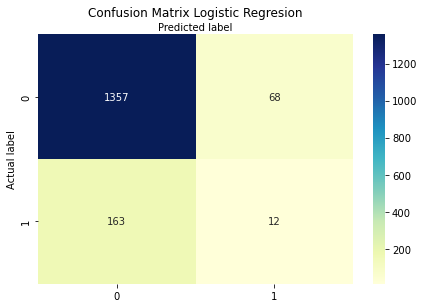

In [26]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_log, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Logistic Regresion')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Decision Tree

Text(0.5, 257.44, 'Predicted label')

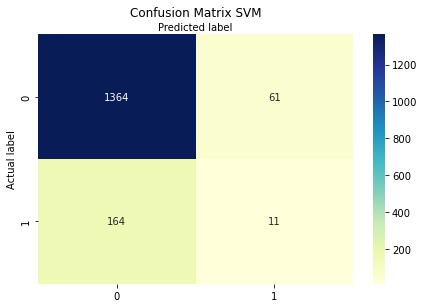

In [27]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_svm, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix SVM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Decision Tree

Text(0.5, 257.44, 'Predicted label')

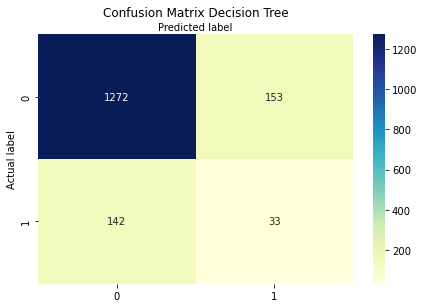

In [28]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_tree, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Neural Network

Text(0.5, 257.44, 'Predicted label')

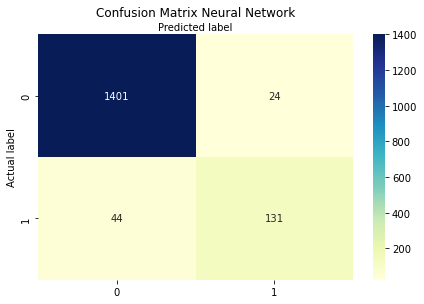

In [29]:
class_names=['0', '1'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix_neural, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Neural Network')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Saving Models

In [30]:
# Import Libraries
import pickle

# Logistic Regression 
pickle.dump(logreg, open('LogRegModel.pkl', 'wb'))

# SVM
pickle.dump(svmClf, open('SVMModel.pkl', 'wb'))

# Decision Tree
pickle.dump(treeClf, open('TreeModel.pkl', 'wb'))

# Neural Network
#pickle.dump(neuralClf, open('NeuralNModel.pkl', 'wb'))